In [6]:
import numpy as np
import matplotlib.pyplot as plt
from src.grid import Boxes
from src.read_data import read_data
import dytop.Grid as Grid
import dytop.CMGDB_util as CMGDB_util
import CMGDB

### Load data

In [7]:
# smooth data
init_data = read_data('vp_ic11all.dat')
next_data = read_data('vp_next11all.dat')

# non-smooth data
# init_data = read_data('vel_phase_ic.dat')
# next_data = read_data('vel_phase_next.dat')

X = init_data[:, [0, 1]]
Y = next_data[:, [0, 1]]

init_impact_phase = init_data[:, 0]
init_impact_velocity = init_data[:, 1]
next_impact_phase = Y[:, 0]
next_impact_velocity = Y[:, 1]


In [8]:
plot_data = True

### Plot initial conditions (first impact) and next conditions (second impact)

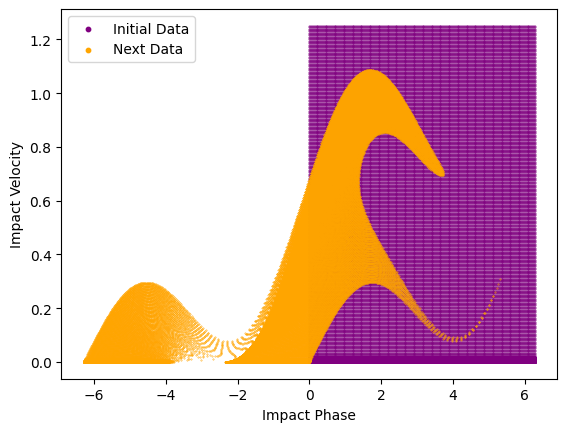

In [9]:
if plot_data: 
    plt.scatter(X[:,0], X[:,1], c='purple', s = 0.1, label='Initial Data')
    plt.scatter(Y[:,0], Y[:,1], c='orange', s = 0.1, label='Next Data')
    plt.xlabel('Impact Phase')
    plt.ylabel('Impact Velocity')
    plt.legend(markerscale=10)

### Phase surface

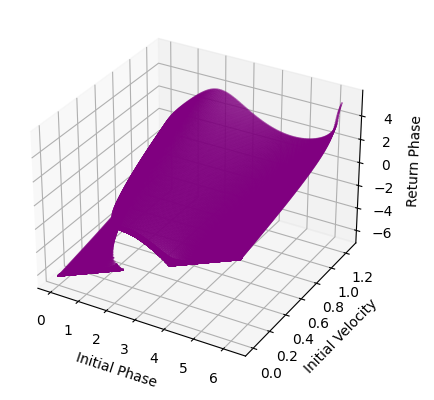

In [10]:
if plot_data:    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlabel('Initial Phase')
    ax.set_ylabel('Initial Velocity')
    ax.set_zlabel('Return Phase')
    ax.scatter(X[:,0], X[:,1], next_impact_phase, c='purple', s=0.1)

### Mod the phase variable by $6.275 \approx 2 \pi$

In [11]:
Y[:, 0] = Y[:, 0] % (6.275)
next_impact_phase = Y[:, 0]

### Plot initial conditions (first impact) and next conditions (second impact)

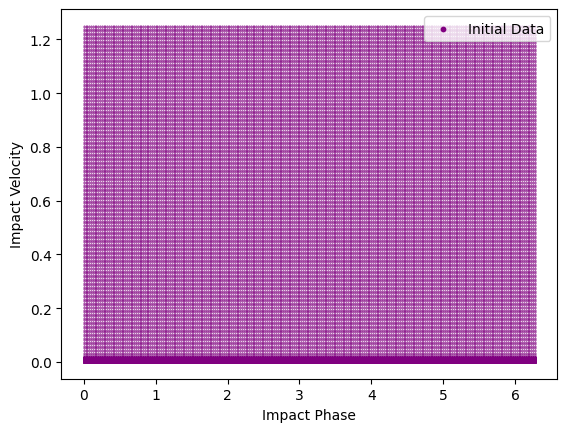

In [12]:
if plot_data: 
    plt.scatter(X[:,0], X[:,1], c='purple', s = 0.1, label='Initial Data')
   # plt.scatter(Y[:,0], Y[:,1], c='orange', s = 0.1, label='Next Data')
    plt.xlabel('Impact Phase')
    plt.ylabel('Impact Velocity')
    plt.legend(markerscale=10)

In [13]:
# # color the initial data with a colorwheel like domain coloring in complex analysis

# def color_wheel(x, y, center_x, center_y):
#     x = x - center_x
#     y = y - center_y
#     r = np.sqrt(x**2 + y**2)
#     theta = np.arctan2(y, x)
#     hue = (theta + np.pi) / (2 * np.pi)
#     saturation = np.ones_like(hue)
#     value = np.ones_like(hue)
#     hsv = np.zeros((len(x), 3))
#     hsv[:, 0] = hue
#     hsv[:, 1] = saturation
#     hsv[:, 2] = value

#     hsv = np.stack([hue, saturation, value], axis=-1)
    
#     # Convert HSV to RGB using matplotlib's hsv colormap
#     rgb = plt.cm.hsv(hue)[:, :3]  # Use only RGB values, discard alpha if included
    
#     return rgb
    
# # calculate center of the data
# center_x = np.mean(X[:,0])
# center_y = np.mean(X[:,1])

# if plot_data:
#     plt.scatter(X[:,0], X[:,1], c=color_wheel(X[:,0], X[:,1], center_x, center_y), s = 0.1, label='Initial Data')
#   #  plt.scatter(X[:,0], X[:,1], c=color_wheel(X[], center_x, center_y), s = 0.1, label='Initial Data')
#    # plt.scatter(Y[:,0], Y[:,1], c='orange', s = 0.1, label='Next Data')
#     plt.xlabel('Impact Phase')
#     plt.ylabel('Impact Velocity')
#     plt.legend(markerscale=10)
#     plt.show()

# # plot the next_phase and next_velocity data colored by the color wheel in the first plot
# if plot_data:
#     plt.scatter(next_impact_phase, next_impact_velocity, c=color_wheel(init_impact_phase, init_impact_velocity, center_x, center_y), s = 0.1, label='Next Data')
#     plt.xlabel('Impact Phase')
#     plt.ylabel('Impact Velocity')
#     plt.legend(markerscale=10)
#     plt.show()

### Phase surface

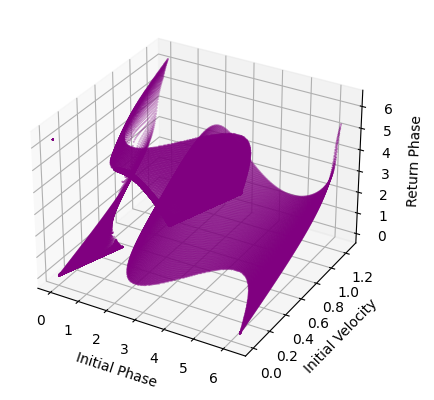

In [14]:
if plot_data:    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlabel('Initial Phase')
    ax.set_ylabel('Initial Velocity')
    ax.set_zlabel('Return Phase')
    ax.scatter(X[:,0], X[:,1], next_impact_phase, c='purple', s=0.1)

### Velocity surface

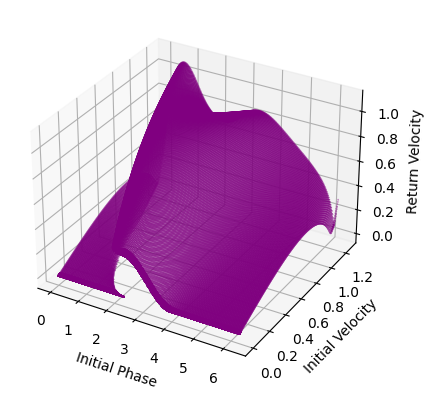

In [15]:
if plot_data:    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:,0], X[:,1], next_impact_velocity, c='purple', s=0.1)
    ax.set_xlabel('Initial Phase')
    ax.set_ylabel('Initial Velocity')
    ax.set_zlabel('Return Velocity')

### Calculate upper and lower bounds
The lower bound on the velocity variable is extended by 0.1.

In [16]:
lower_bounds_init = [np.min(init_impact_phase), np.min(init_impact_velocity)]
upper_bounds_init = [np.max(init_impact_phase), np.max(init_impact_velocity)]
print('Lower init bounds: ', lower_bounds_init)
print('Upper init bounds ', upper_bounds_init)

lower_next_bounds = [np.min(next_impact_phase), np.min(next_impact_velocity)]
upper_next_bounds = [np.max(next_impact_phase), np.max(next_impact_velocity)]
print('Lower next bounds ', lower_next_bounds)
print('Upper next bounds ', upper_next_bounds)

lower_bounds = [min(lower_bounds_init[0], lower_next_bounds[0]), min(lower_bounds_init[1], lower_next_bounds[1])]
upper_bounds = [max(upper_bounds_init[0], upper_next_bounds[0]), max(upper_bounds_init[1], upper_next_bounds[1])]
print('Lower bounds:', lower_bounds)
print('Upper bounds:', upper_bounds)

lower_bounds = [0, 0]
upper_bounds = [6.275, 1.25]


Lower init bounds:  [0.0, 2e-06]
Upper init bounds  [6.275, 1.25]
Lower next bounds  [4.9592564e-05, 2.2232226e-06]
Upper next bounds  [6.274953266944, 1.0870663]
Lower bounds: [0.0, 2e-06]
Upper bounds: [6.275, 1.25]


### Persistence to identify potential discontinuities

In [17]:
# boxes = Boxes(lower_bounds_init, upper_bounds_init, 20)
# boxes.plot(init_data, next_data, method='persistence')

### Conley-Morse graph

Here we use a periodic boundary condition on the phase variable.

Compute_Morse_Graph. Initializing root MorseDecomposition
Compute_Morse_Graph. A phase_space -> size () == 16384
Compute_Morse_Graph. B phase_space -> size () == 16384
Total Grid Memory (can be external) = 1245406
Max Memory For Single Grid (must be internal)= 1245406
Max SCC Random Access memory use (must be internal)= 139264
Max SCC stack memory use (can be external memory) = 298808
 ---- SUMMARY ---- 
Internal Memory Requirement = 1384670
External Memory Requirement = 1544214
Max graph memory size (never stored, however) = 2735024
ConleyIndex: calling RelativeMapHomology.
Dimension 0:
 Matrix is 1 x 1
[ 1 ]
ConleyIndex: calling RelativeMapHomology.
Problem computing conley index. Returning undefined result.
conleyIndexString.
conleyIndexString. Dimension is 0
conleyIndexString. Wrote the polynomial x-1
conleyIndexString. Dimension is 1
conleyIndexString. Wrote the polynomial 0
conleyIndexString. Dimension is 2
conleyIndexString. Wrote the polynomial 0
conleyIndexString.
conleyIndexS

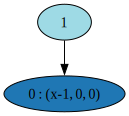

In [18]:
data = np.concatenate((X,Y),axis=1)

subdiv_limit = 10000

# k is the padding variable
k = 0.5

sb = 14

phase_periodic = [True, False]

grid = Grid.Grid(lower_bounds, upper_bounds, sb)

id2image = grid.id2image(data)

MG_util = CMGDB_util.CMGDB_util()

# uniform padding for each dimension
K=[k, k]
def F(rect):
    # return MG_util.F_data(rect, id2image, grid.point2cell, K)
    return MG_util.F_data_enforce_bounds(rect, id2image, grid.point2cell, K, lower_bounds, upper_bounds, phase_periodic, verbose=True)

subdiv_init = sb
subdiv_min = sb
subdiv_max = sb

model = CMGDB.Model(sb, sb, sb, subdiv_limit,
                    lower_bounds, upper_bounds, phase_periodic, F)

morse_graph, map_graph = CMGDB.ComputeConleyMorseGraph(model)

CMGDB.PlotMorseGraph(morse_graph)

### Morse sets

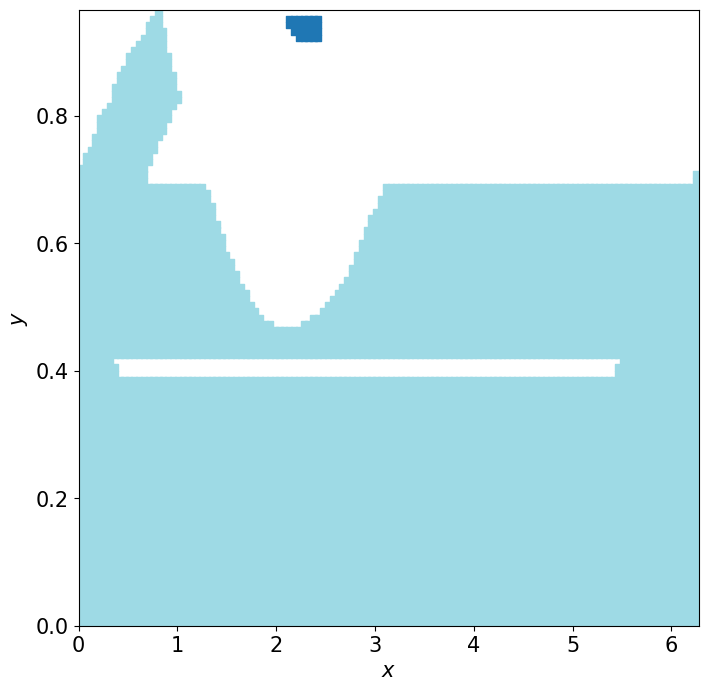

In [19]:
CMGDB.PlotMorseSets(morse_graph)